In [1]:
import tensorflow as tf
from keras.applications import VGG16

##### Loading pre-trained VGG16 model without including the top three fully connected layers

In [2]:
base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(64,64,3)
)

In [3]:
base_model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [4]:
x = base_model.output # Output of VGG16 is tensor(4-D Tensor) of shape (None, 2, 2, 512). This shape depends on the shape of input image and filters used.
x

<KerasTensor: shape=(None, 2, 2, 512) dtype=float32 (created by layer 'block5_pool')>

In [5]:
base_model.input

<KerasTensor: shape=(None, 64, 64, 3) dtype=float32 (created by layer 'input_1')>

In [6]:
# Flatten the output of base model
x = tf.keras.layers.Flatten()(x)

In [7]:
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

In [8]:
model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

In [9]:
base_model.trainable = False


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation - Data augmentation is a set of techniques to artificially increase the amount 
# of data by generating new data points from existing data
train_datagen = ImageDataGenerator(
    rescale=1./255,     #feature scaling--->putting all values between 0 and 1
    shear_range=0.2,    #Shear angle in the counter-clockwise direction in degrees
    zoom_range=0.2,
    horizontal_flip=True    #Radomly flip inputs horizontally
)    

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_set = train_datagen.flow_from_directory('./MachineLearning/TransferLearning/training_set', target_size=(64,64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('./MachineLearning/TransferLearning/test_set', target_size=(64,64), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
history = model.fit(train_set, epochs=20, validation_data=test_set)

Epoch 1/20
250/250 [==============================] - 180s 714ms/step - loss: 0.5289 - accuracy: 0.7368 - val_loss: 0.4626 - val_accuracy: 0.7810
Epoch 2/20
250/250 [==============================] - 184s 737ms/step - loss: 0.4609 - accuracy: 0.7819 - val_loss: 0.4448 - val_accuracy: 0.7900
Epoch 3/20
250/250 [==============================] - 186s 745ms/step - loss: 0.4476 - accuracy: 0.7901 - val_loss: 0.4310 - val_accuracy: 0.8020
Epoch 4/20
250/250 [==============================] - 185s 740ms/step - loss: 0.4353 - accuracy: 0.7954 - val_loss: 0.4295 - val_accuracy: 0.7945
Epoch 5/20
250/250 [==============================] - 187s 746ms/step - loss: 0.4285 - accuracy: 0.7950 - val_loss: 0.4407 - val_accuracy: 0.7890
Epoch 6/20
250/250 [==============================] - 188s 754ms/step - loss: 0.4246 - accuracy: 0.8006 - val_loss: 0.4236 - val_accuracy: 0.8075
Epoch 7/20
250/250 [==============================] - 188s 753ms/step - loss: 0.4190 - accuracy: 0.8016 - val_loss: 0.4204 -

In [17]:
model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 64, 64, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'block1_conv1',
    'trainable': False,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'block1_conv1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   

In [18]:
history.history

{'loss': [0.5289287567138672,
  0.4609282314777374,
  0.4476274847984314,
  0.43532732129096985,
  0.42847657203674316,
  0.42456355690956116,
  0.419039785861969,
  0.4188271164894104,
  0.4115844964981079,
  0.4092174768447876,
  0.4127510190010071,
  0.4077262282371521,
  0.40303945541381836,
  0.40212133526802063,
  0.40303194522857666,
  0.3983110785484314,
  0.3963061273097992,
  0.39615073800086975,
  0.4031859040260315,
  0.4009193181991577],
 'accuracy': [0.7367500066757202,
  0.7818750143051147,
  0.7901250123977661,
  0.7953749895095825,
  0.7950000166893005,
  0.8006250262260437,
  0.8016250133514404,
  0.8044999837875366,
  0.8073750138282776,
  0.809374988079071,
  0.8040000200271606,
  0.8146250247955322,
  0.812250018119812,
  0.8137500286102295,
  0.8115000128746033,
  0.8131250143051147,
  0.8180000185966492,
  0.8163750171661377,
  0.8142499923706055,
  0.8137500286102295],
 'val_loss': [0.4626133143901825,
  0.4447624385356903,
  0.4309665560722351,
  0.429527461528

In [19]:
import matplotlib.pyplot as plt

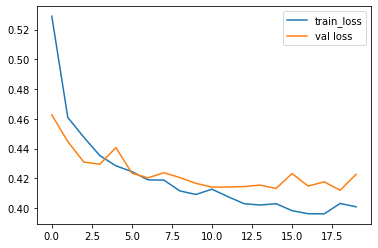

In [38]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


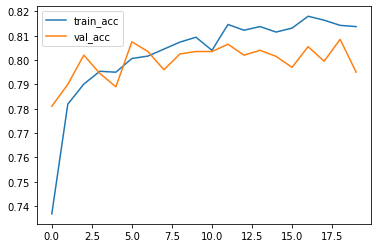

In [21]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [22]:
model.save('./MachineLearning/TransferLearning/vgg_16_3.h5')

In [23]:
import numpy as np
from keras.utils import load_img, img_to_array

In [25]:
test_image = load_img('./MachineLearning/TransferLearning/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))

In [26]:
test_image2 = load_img('./MachineLearning/TransferLearning/single_prediction/cat_or_dog_2.jpg', target_size=(64,64))

In [27]:
test_image = img_to_array(test_image)
test_image2 = img_to_array(test_image2)

In [28]:
test_image = np.expand_dims(test_image, axis=0)
test_image2 = np.expand_dims(test_image2, axis=0)

In [29]:
result = model.predict(test_image)

1/1 [==============================] - 1s 533ms/step


In [30]:
result2 = model.predict(test_image2)

1/1 [==============================] - 0s 76ms/step


In [31]:
result

array([[1.]], dtype=float32)

In [32]:
result2

array([[2.0570085e-22]], dtype=float32)

In [34]:
round(result2[0][0])

0

In [35]:
train_set.class_indices

{'cats': 0, 'dogs': 1}